In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
base_dir = '/content/drive/MyDrive/datasets_ai_bootcamp'


In [4]:

IMAGE_SIZE = 224 
BATCH_SIZE = 64 

datagen = tf.keras.preprocessing.image.ImageDataGenerator( 
    rescale = 1./255, 
    validation_split=0.2 
   
)

train_generator = datagen.flow_from_directory( 
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  
    batch_size = BATCH_SIZE, 
    subset='training' 
)
val_generator = datagen.flow_from_directory(  
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 158 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [5]:
sample_train_images,_=next(train_generator)


In [6]:
def plotimages(image_arr):
  fig,axes=plt.subplots(1,4,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(image_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

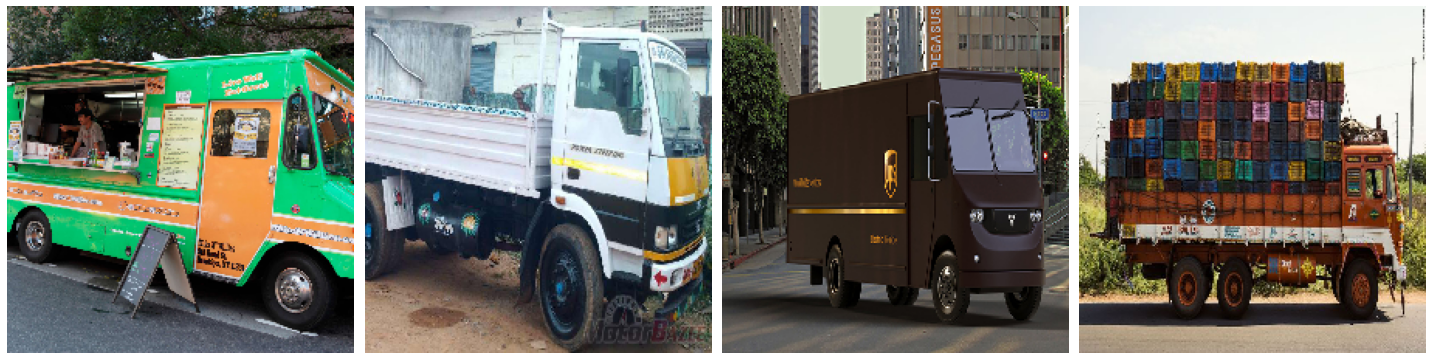

In [7]:
plotimages(sample_train_images[:4])


In [8]:
print(train_generator.class_indices) 
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f: 
    f.write(labels)

{'ships': 0, 'trucks': 1}


In [9]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3) 

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 64)        36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 173056)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [29]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])



In [41]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
  monitor='val_accuracy', min_delta=0.0001, patience=3)

In [42]:
history = model.fit(train_generator, epochs=10, 
                    validation_data=val_generator,callbacks=[earlystop_callback])

Epoch 1/10
3/3 [==============================] - 17s 6s/step - loss: 8.8752 - accuracy: 0.4937 - val_loss: 6.4175 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 16s 5s/step - loss: 8.8752 - accuracy: 0.4937 - val_loss: 6.4175 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 16s 4s/step - loss: 8.8752 - accuracy: 0.4937 - val_loss: 6.4175 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 16s 6s/step - loss: 8.8752 - accuracy: 0.4937 - val_loss: 6.4175 - val_accuracy: 0.5000


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


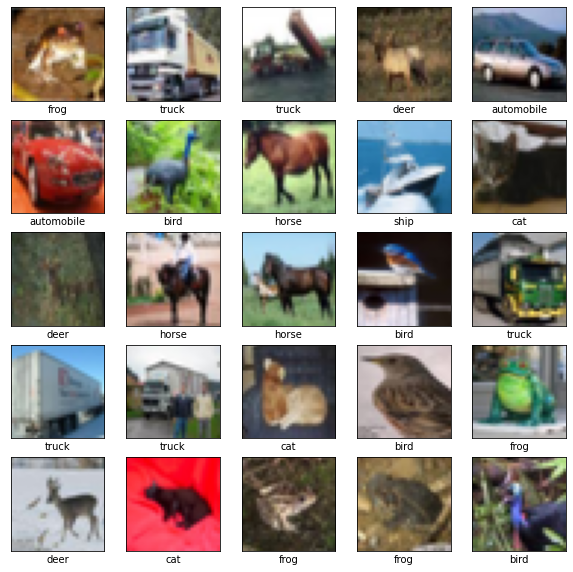

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Create the convolutional base

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.5678 - accuracy: 0.7992 - val_loss: 0.9321 - val_accuracy: 0.6990
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.5353 - accuracy: 0.8088 - val_loss: 0.9175 - val_accuracy: 0.7138
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.5058 - accuracy: 0.8213 - val_loss: 0.9567 - val_accuracy: 0.7016
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.4789 - accuracy: 0.8296 - val_loss: 0.9254 - val_accuracy: 0.7139
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.4524 - accuracy: 0.8387 - val_loss: 0.9544 - val_accuracy: 0.7145
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4257 - accuracy: 0.8466 - val_loss: 1.0030 - val_accuracy: 0.7083
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.3998 - accuracy: 0.8558 - val_loss: 1.0255 -

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)